# Objects with a variable refraction index


## Sphere

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.dpi']=125
rcParams['figure.figsize']=(5,5)

In [3]:
x0 = np.linspace(-120 * um, 120 * um, 1024 * 2)
z0 = np.linspace(0 * um, 250 * um, 1024 * 2)
wavelength = 1.5 * um

In [4]:
w0=10*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=35 * um, z0=-250 * um, w0=w0, theta=0. * degrees)
u1 = Scalar_source_X(x=x0, wavelength=wavelength)
u1.gauss_beam(A=1, x0=0 * um, z0=-250 * um, w0=w0, theta=0. * degrees)

u2 = Scalar_source_X(x=x0, wavelength=wavelength)
u2.gauss_beam(
    A=1, x0=-35 * um, z0=-250 * um, w0=w0, theta=0. * degrees)

uf = u0 + u1 + u2

In [5]:
t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(uf)

pn = dict(n_out=1.5, n_center=4, cx=0, cz=125, radius=100)

# ref_index = "{p[n_out]}".format(p=pn)
center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)
print("n={}".format(ref_index))

t0.sphere(
    r0=(0, 100),
    radius=(pn['radius'], pn['radius']),
    refraction_index=1.0,
    angle=0)
t0.sphere(
    r0=center, radius=(radius, radius), refraction_index=ref_index, angle=0);

n=1.5+(4-1.5)*(1-((X-0)**2+(Z-125)**2)/100**2)


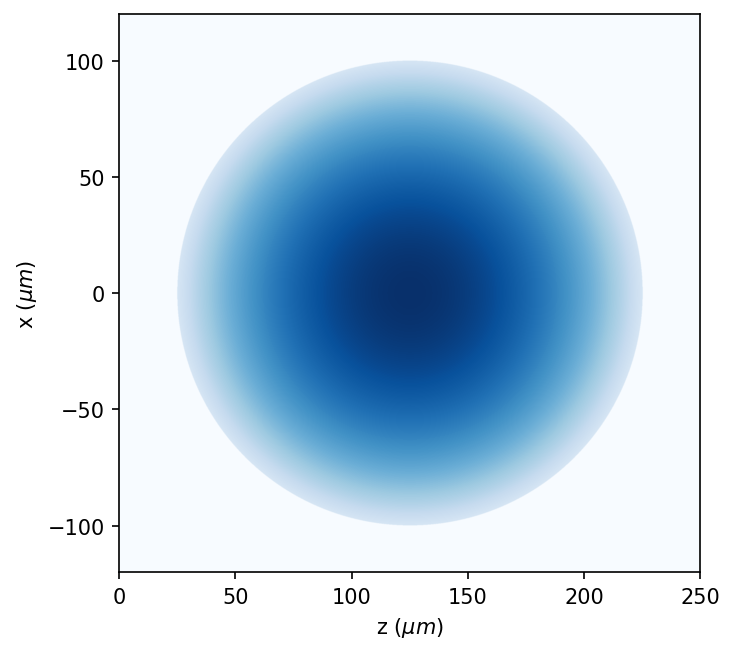

In [6]:
t0.draw_refraction_index(draw_borders=False, scale='scaled');

In [7]:
t0.BPM(verbose=False)

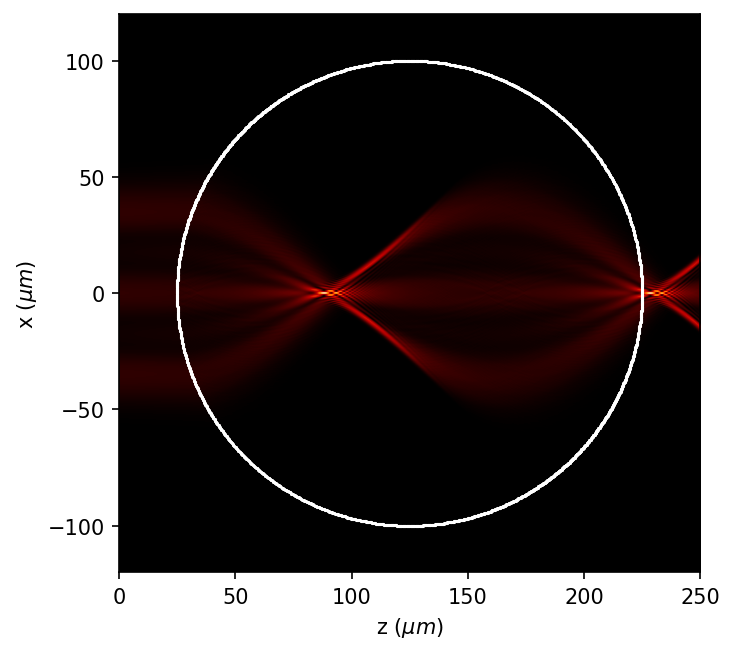

In [8]:
t0.draw(
    kind='intensity',
    logarithm=True,
    draw_borders=True,
    min_incr=0.05,
    scale='scaled');

(200.0, 250.0)

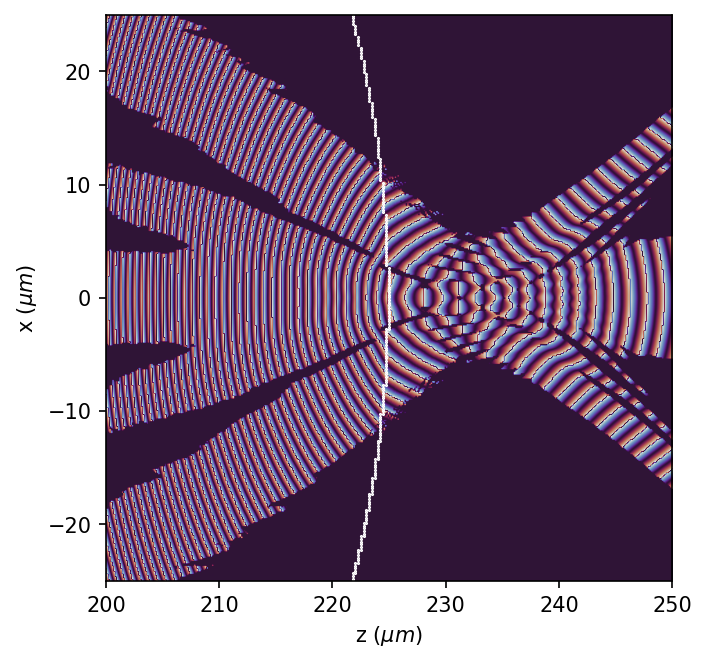

In [9]:
t0.draw(
    kind='phase',
    logarithm=True,
    draw_borders=True,
    min_incr=0.05,
    scale='scaled');
plt.ylim(-25,25)
plt.xlim(200,250)

## Grin Lens

In [10]:
x0 = np.linspace(-1000 * um, 1000 * um, 1024 * 2)
z0 = np.linspace(0 * um, 14500 * um, 1024 * 2)
wavelength = .85 * um

In [11]:
w0 = 500 * um
z0_beam = 200 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=z0_beam, w0=w0, theta=0. * degrees)

In [12]:
t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(u0)

pn = dict(n_out=1.5, n_center=1.8, width=1500 * um, x_fiber=0 * um)
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(np.exp(-abs(X-{p[x_fiber]})**2/{p[width]}**2))".format(
    p=pn)

print("n={}".format(ref_index))

t0.rectangle(
    r0=(0, 4600 * um),
    size=(1500 * um, 6075 * um),
    refraction_index=ref_index,
    angle=0 * degrees);

n=1.5+(1.8-1.5)*(np.exp(-abs(X-0.0)**2/1500.0**2))


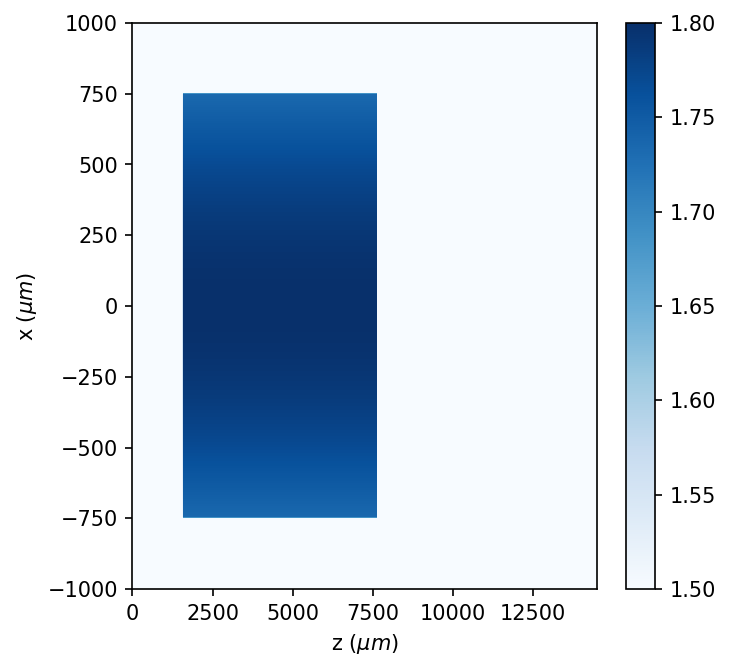

In [13]:
t0.draw_refraction_index(draw_borders=False, colorbar_kind='vertical');
plt.clim(1.5,1.8)

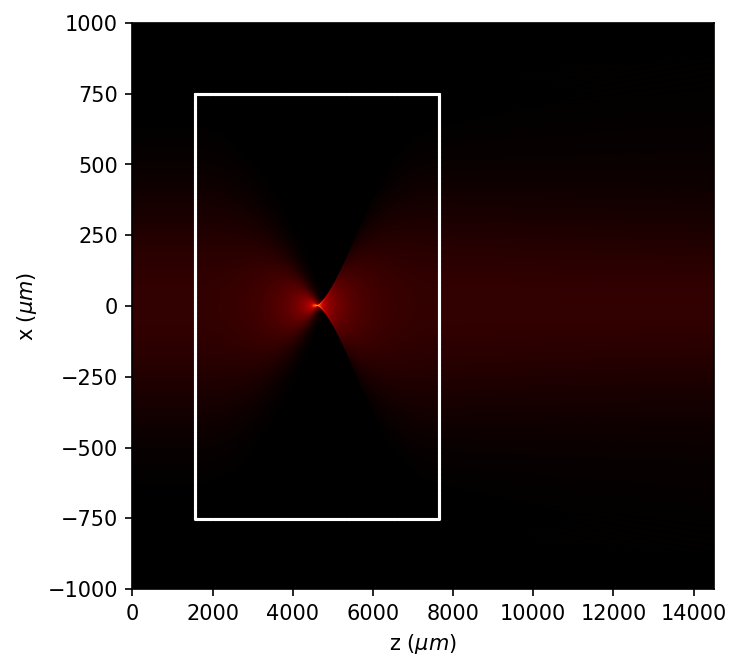

In [14]:
t0.BPM(verbose=False)
t0.draw(kind='intensity', logarithm=True, draw_borders=True, min_incr=0.05);

Now, let us see the phase of the final field, which is quite plane at the center.

In [15]:
u1=t0.final_field()

In [16]:
phase=np.unwrap(np.angle(u1.u))
phase=phase-phase.min()

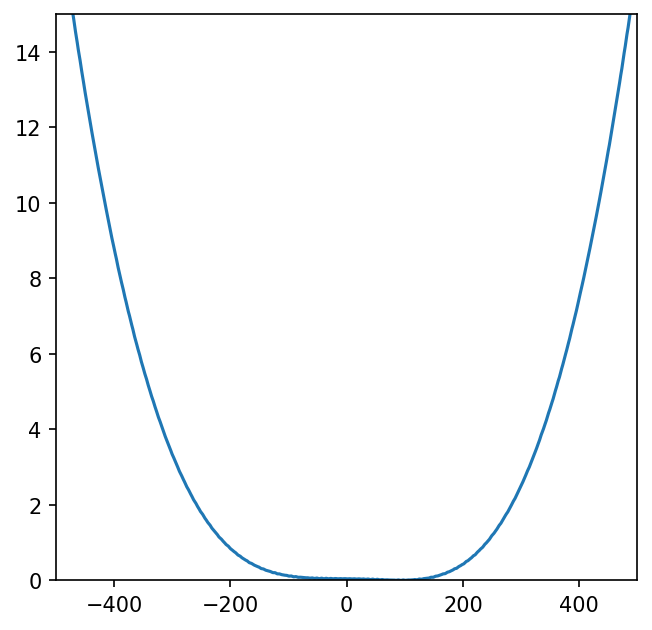

In [17]:
plt.plot(u1.x, phase)
plt.xlim(-500,500)
plt.ylim(0,15);

## Optical Fiber

In this example, we see how a optical fiber can be modelled using diffractio.scalar_mask_xy. First, we define a rectangle as a shape, and after, we provide a refraction index with a cuadratic shape.

In [18]:
from matplotlib import rcParams

rcParams['figure.figsize']=(10,4)
rcParams['figure.dpi']=125

In [19]:
x0 = np.linspace(-15 * um, 15 * um, 1024)
z0 = np.linspace(0 * um, 700 * um, 4096)
wavelength = 0.5 * um

### Aligned beam input

Beam definition

In [20]:
w0 = 2 * um
z0_beam = 25 * um
aligment=0*um

In [21]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=aligment, z0=50*um, w0=2*um, theta=0. * degrees)

Fiber definition

n=1.48+(1.5-1.48)*(np.exp(-(X-0.0)**2/2.0**2))


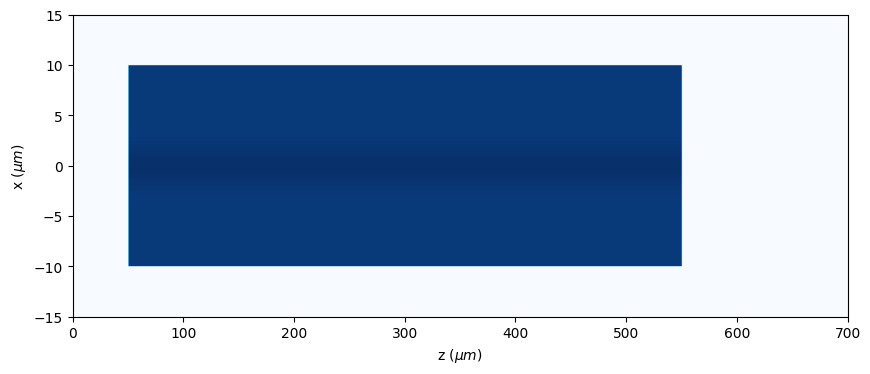

In [22]:
t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(u0)

pn = dict(n_out=1.48, n_center=1.5, width= 2* um, x_fiber=0 * um)
# ref_index = 'nexp(-(x-x0)**2/w0**2)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(np.exp(-(X-{p[x_fiber]})**2/{p[width]}**2))".format(
    p=pn)

print("n={}".format(ref_index))

t0.rectangle(
    r0=(0, 300 * um),
    size=(20 * um, 500 * um),
    refraction_index=ref_index)

t0.draw_refraction_index(draw_borders=False, scale='');

Propagation and representation

In [23]:
t0.BPM(verbose=False)

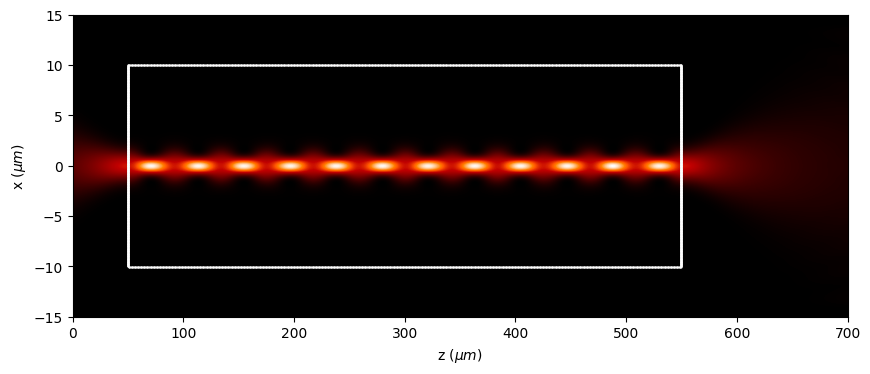

In [24]:
t0.draw(
    kind='intensity', logarithm=False, draw_borders=True, min_incr=0.05);

### Misaligned laser input

In the following example, the laser beam is not completely aligned with the center of the fiber, but there is a misaligned of 1 micron. The beam propagation by the fiber is still possible.

Beam definition

In [25]:
aligment = 1*um

In [26]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=aligment, z0=50*um, w0=2*um, theta=0. * degrees)

Fiber definition

In [27]:
t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(u0)

pn = dict(n_out=1.48, n_center=1.5, width=2 * um, x_fiber=0 * um)
# ref_index = 'nexp(-(x-x0)**2/w0**2)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(np.exp(-(X-{p[x_fiber]})**2/{p[width]}**2))".format(
    p=pn)

print("n={}".format(ref_index))

t0.rectangle(
    r0=(0, 300 * um), size=(20 * um, 500 * um), refraction_index=ref_index);

n=1.48+(1.5-1.48)*(np.exp(-(X-0.0)**2/2.0**2))


Propagation and representation

In [28]:
t0.BPM(verbose=False)

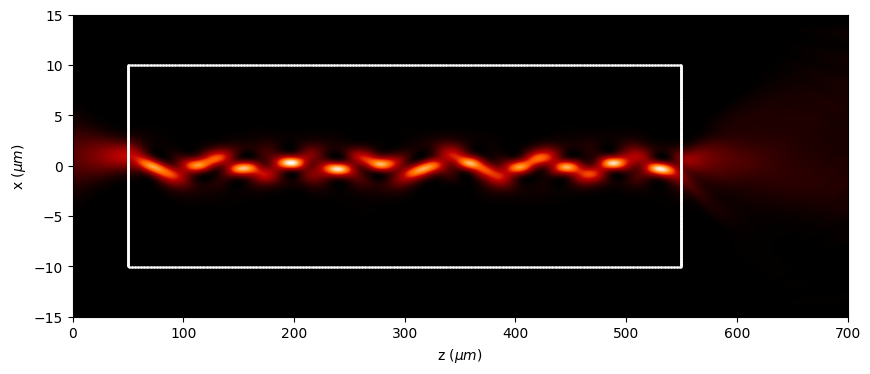

In [29]:
t0.draw(
    kind='intensity', logarithm=False, draw_borders=True, min_incr=0.05);